# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key as w_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [99]:
found_city = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0

print('Beginning Data Retrieval')
print('-----------------------------------')

for city in cities:
    
    #Specify base URL and the desired units
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    # Build partial query URL
    query_url = f"{url}appid={w_api}&units={units}&q=" + city
    
    response = requests.get(query_url)
    response_json = response.json()
    
    try:
        record = record + 1
        found_city.append(response_json['name'])
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(datetime.utcfromtimestamp(response_json['dt']).strftime('%Y-%m-%d %H:%M:%S'))
        
        print(f"Processing Record {record}. | {city.title()}")
    except:
        print(f"Record: {record} / City: {city.title()} not found. Proceeding to next record. ")

print('-----------------------------------')
print('Data Retrieval Complete')
print('-----------------------------------')

Beginning Data Retrieval
-----------------------------------
Processing Record 1. | Ahipara
Processing Record 2. | Muros
Processing Record 3. | Ribeira Grande
Processing Record 4. | Marawi
Processing Record 5. | Busselton
Processing Record 6. | Santa Maria
Processing Record 7. | Visnes
Processing Record 8. | Nueve De Julio
Processing Record 9. | Mataura
Processing Record 10. | Kapaa
Processing Record 11. | Esfahan
Processing Record 12. | Cabedelo
Processing Record 13. | Georgetown
Processing Record 14. | Mayo
Processing Record 15. | Los Llanos De Aridane
Processing Record 16. | Severo-Kurilsk
Record: 17 / City: Illoqqortoormiut not found. Proceeding to next record. 
Processing Record 18. | Tuatapere
Processing Record 19. | Nikolskoye
Processing Record 20. | Kodiak
Processing Record 21. | Bredasdorp
Processing Record 22. | Clyde River
Processing Record 23. | Boende
Processing Record 24. | Yellowknife
Processing Record 25. | Todos Santos
Processing Record 26. | Rikitea
Record: 27 / City:

Processing Record 224. | Merauke
Record: 225 / City: Jujuy not found. Proceeding to next record. 
Processing Record 226. | Berlevag
Processing Record 227. | Saskylakh
Processing Record 228. | Flinders
Processing Record 229. | Ballyhaunis
Processing Record 230. | Nioki
Processing Record 231. | Bom Jesus Da Lapa
Processing Record 232. | Victoria
Processing Record 233. | Ilebo
Processing Record 234. | Kavaratti
Processing Record 235. | Sisophon
Processing Record 236. | Sitka
Processing Record 237. | Kuvandyk
Record: 238 / City: Mocambique not found. Proceeding to next record. 
Processing Record 239. | Baisha
Processing Record 240. | Belaya Gora
Processing Record 241. | Isangel
Processing Record 242. | Olafsvik
Processing Record 243. | Coquimbo
Processing Record 244. | Beringovskiy
Processing Record 245. | Astrea
Processing Record 246. | Corlatel
Processing Record 247. | Longyearbyen
Record: 248 / City: Amderma not found. Proceeding to next record. 
Processing Record 249. | Kenai
Processin

Processing Record 448. | Itaituba
Processing Record 449. | Zhigansk
Processing Record 450. | Shumikha
Record: 451 / City: Saleaula not found. Proceeding to next record. 
Processing Record 452. | Wanning
Processing Record 453. | Rosetta
Processing Record 454. | Beatrice
Processing Record 455. | Lahat
Processing Record 456. | Soyo
Processing Record 457. | Khasan
Processing Record 458. | Lamar
Processing Record 459. | Hasaki
Processing Record 460. | Aksarka
Processing Record 461. | Collinsville
Processing Record 462. | Port Elizabeth
Processing Record 463. | Kruisfontein
Processing Record 464. | Westport
Processing Record 465. | Riyadh
Processing Record 466. | Kangaatsiaq
Processing Record 467. | Tigil
Processing Record 468. | Owerri
Processing Record 469. | Aqtobe
Processing Record 470. | Lira
Processing Record 471. | Kommunisticheskiy
Record: 472 / City: Sentyabrskiy not found. Proceeding to next record. 
Processing Record 473. | San Francisco
Processing Record 474. | Shingu
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [100]:
city_weather = pd.DataFrame({'City': found_city,
                             'Latitude': latitude,
                             'Longitude': longitude,
                             'Max Temperature (degF)': max_temp,
                             'Humidity (%)': humidity,
                             'Cloudiness (%)': cloudiness,
                             'Wind Speed (mph)': wind_speed,
                             'Country': country,
                             "Date/Time (UTC)": date})

city_weather.to_csv(output_data_file, index = False)

In [101]:
city_weather

,City,Latitude,Longitude,Max Temperature (degF),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date/Time (UTC)
0,Ahipara,-35.17,173.17,55.99,84,82,3.78,NZ,2020-06-13 13:44:24
1,Muros,42.78,-9.06,63.00,76,49,11.99,ES,2020-06-13 13:44:24
2,Ribeira Grande,38.52,-28.70,62.60,59,40,14.99,PT,2020-06-13 13:44:24
3,Marawi,8.00,124.29,79.00,85,100,5.99,PH,2020-06-13 13:44:24
4,Busselton,-33.65,115.33,55.00,76,7,11.16,AU,2020-06-13 13:44:24
...,...,...,...,...,...,...,...,...,...
586,Singaraja,-8.11,115.09,79.83,79,89,7.09,ID,2020-06-13 13:42:40
587,Nkhata Bay,-11.61,34.29,77.00,44,43,7.27,MW,2020-06-13 13:46:24
588,Liberal,37.04,-100.92,66.20,39,1,16.11,US,2020-06-13 13:46:24
589,Alofi,-19.06,-169.92,71.60,64,0,11.41,NU,2020-06-13 13:46:24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
max_humidity = city_weather['Humidity (%)'].max()

if max_humidity <= 100:
    print('No city has a humidity greater than 100%')
    
#No cities have a humidity of greater than 100%

No city has a humidity greater than 100%


In [103]:
#  Get the indices of cities that have humidity over 100%.


In [104]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [105]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

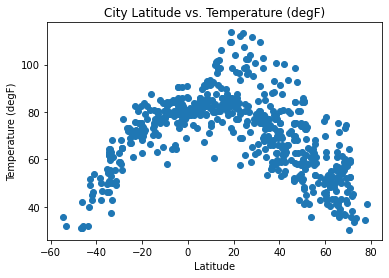

As one would expect, the closer tothe equater one is, the higher the temperature.
What is interesting to note, however, is that in the plot above you can see that
the max temperature below the equator is more stable, plateauing below 30 degC.


In [106]:
#Assign Axes
x_values = city_weather['Latitude']
y_values = city_weather['Max Temperature (degF)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('City Latitude vs. Temperature (degF)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Temperature (degF)')

#Display Graph
plt.show()

#Analysis
print('As one would expect, the closer tothe equater one is, the higher the temperature.')
print('What is interesting to note, however, is that in the plot above you can see that')
print('the max temperature below the equator is more stable, plateauing below 30 degC.')

## Latitude vs. Humidity Plot

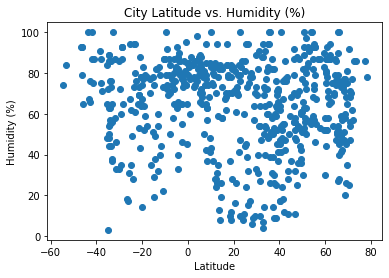

There appears to be more evenly dispersed humidity levels in the northern hemisphere
whereas in the southern hemisphere, the humidity levels are generally higher.


In [107]:
#Assign Axes
x_values = city_weather['Latitude']
y_values = city_weather['Humidity (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('City Latitude vs. Humidity (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Humidity (%)')

#Display Graph
plt.show()

#Analysis
print('There appears to be more evenly dispersed humidity levels in the northern hemisphere')
print('whereas in the southern hemisphere, the humidity levels are generally higher.')


## Latitude vs. Cloudiness Plot

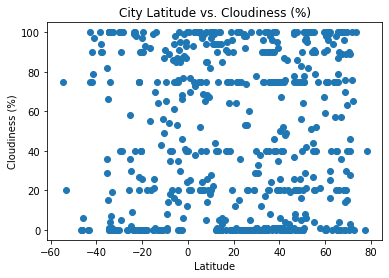

Based on graph analysis alone, locations appear to be more likely to report
values at numbers that they are comfortable with (i.e. 100%, 75%, 40%,
20% and 0%). That would be my explanation of the "lines" in the plot below.


In [108]:
#Assign Axes
x_values = city_weather['Latitude']
y_values = city_weather['Cloudiness (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('City Latitude vs. Cloudiness (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Cloudiness (%)')

#Display Graph
plt.show()

print('Based on graph analysis alone, locations appear to be more likely to report')
print('values at numbers that they are comfortable with (i.e. 100%, 75%, 40%,')
print('20% and 0%). That would be my explanation of the "lines" in the plot below.')

## Latitude vs. Wind Speed Plot

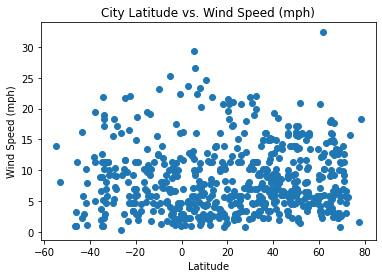

Finding a pattern in the above plot is more difficult. The wind speed data looks
to be more heterogeneous with the majority of values being reported at below 8 m/s.


In [109]:
#Assign Axes
x_values = city_weather['Latitude']
y_values = city_weather['Wind Speed (mph)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('City Latitude vs. Wind Speed (mph)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Wind Speed (mph)')

#Display Graph
plt.show()

#Analysis
print('Finding a pattern in the above plot is more difficult. The wind speed data looks')
print('to be more heterogeneous with the majority of values being reported at below 8 m/s.')

## Linear Regression

In [110]:
# OPTIONAL: Create a function to create Linear Regression plots

In [111]:
# Create Northern and Southern Hemisphere DataFrames

north = city_weather.loc[city_weather['Latitude'] >= 0]
south = city_weather.loc[city_weather['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

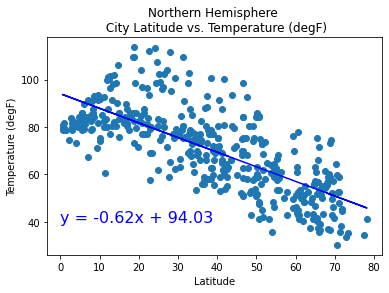

The correlation coefficient between Northern Hemisphere Latitude and Temperature is -0.73


In [137]:
#Assign Axes
x_values = north['Latitude']
y_values = north['Max Temperature (degF)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Northern Hemisphere \n City Latitude vs. Temperature (degF)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Temperature (degF)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(0, 40),color="blue", fontsize = 16)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Northern Hemisphere Latitude and Temperature is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

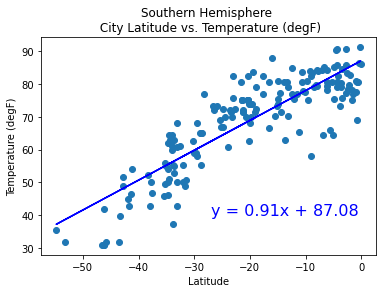

The correlation coefficient between Southern Hemisphere Latitude and Temperature is 0.86


In [139]:
#Assign Axes
x_values = south['Latitude']
y_values = south['Max Temperature (degF)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Southern Hemisphere \n City Latitude vs. Temperature (degF)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Temperature (degF)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(-27, 40),color="blue", fontsize = 16)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Southern Hemisphere Latitude and Temperature is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

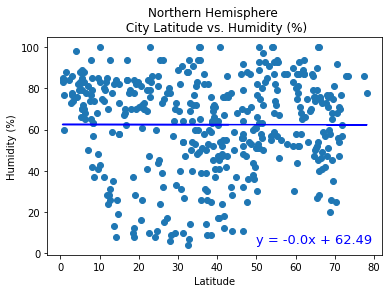

The correlation coefficient between Northern Hemisphere Latitude and Humidity is -0.0


In [140]:
#Assign Axes
x_values = north['Latitude']
y_values = north['Humidity (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Northern Hemisphere \n City Latitude vs. Humidity (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Humidity (%)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(50, 5),color="blue", fontsize = 13)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Northern Hemisphere Latitude and Humidity is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

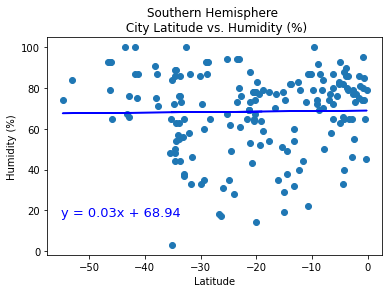

The correlation coefficient between Southern Hemisphere Latitude and Humidity is 0.02


In [141]:
#Assign Axes
x_values = south['Latitude']
y_values = south['Humidity (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Southern Hemisphere \n City Latitude vs. Humidity (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Humidity (%)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(-55, 17),color="blue", fontsize = 13)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Southern Hemisphere Latitude and Humidity is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

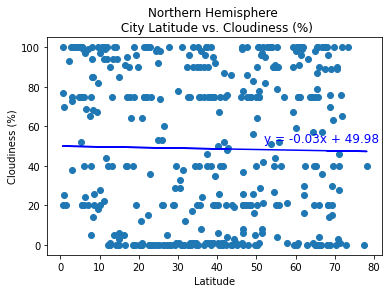

The correlation coefficient between Northern Hemisphere Latitude and Cloudiness is -0.02


In [142]:
#Assign Axes
x_values = north['Latitude']
y_values = north['Cloudiness (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Northern Hemisphere \n City Latitude vs. Cloudiness (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Cloudiness (%)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(52, 52),color="blue", fontsize = 12)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Northern Hemisphere Latitude and Cloudiness is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

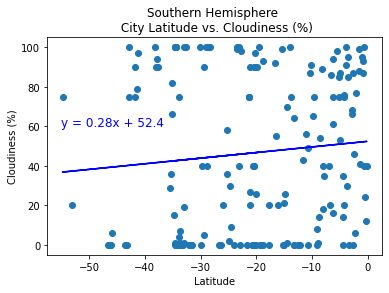

The correlation coefficient between Southern Hemisphere Latitude and Cloudiness is 0.1


In [143]:
#Assign Axes
x_values = south['Latitude']
y_values = south['Cloudiness (%)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Southern Hemisphere \n City Latitude vs. Cloudiness (%)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Cloudiness (%)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(-55, 60),color="blue", fontsize = 12)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Southern Hemisphere Latitude and Cloudiness is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

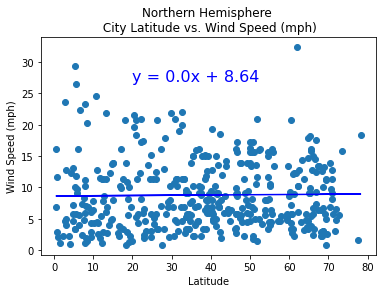

The correlation coefficient between Northern Hemisphere Latitude and Wind Speed is 0.01


In [144]:
#Assign Axes
x_values = north['Latitude']
y_values = north['Wind Speed (mph)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Northern Hemisphere \n City Latitude vs. Wind Speed (mph)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Wind Speed (mph)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(20, 27),color="blue", fontsize = 16)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Northern Hemisphere Latitude and Wind Speed is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

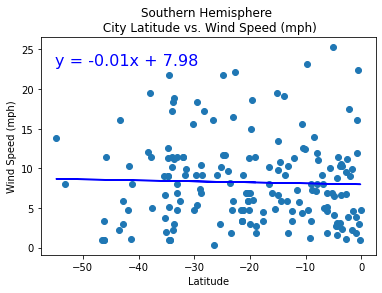

The correlation coefficient between Southern Hemisphere Latitude and Wind Speed is -0.03


In [145]:
#Assign Axes
x_values = south['Latitude']
y_values = south['Wind Speed (mph)']

plt.scatter(x_values, y_values)
#Title Chart
plt.title('Southern Hemisphere \n City Latitude vs. Wind Speed (mph)')

#Title X-Axis
plt.xlabel('Latitude')

#Title Y-Axis
plt.ylabel('Wind Speed (mph)')

#Find Linear Regression Values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Create Equation for the Line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Annotate line equation on scatter plit
plt.annotate(line_eq,(-55, 23),color="blue", fontsize = 16)

#Create and Display linear regression best-fit for data
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, color='blue')

#Display Plot
plt.show()

#Calculate correlation coefficient (not required, but wanted an indicator of fit)
correlation = st.pearsonr(x_values,y_values)

#Display Pearson correlation coefficient
print(f"The correlation coefficient between Southern Hemisphere Latitude and Wind Speed is {round(correlation[0],2)}")